# Q1. Data Preprocessing steps include imputing missing values, feature transformation, encoding categorical features, feature scaling and feature selection.

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
import torch.optim as optim
import numpy as np
# pytorch libraries
import torch
from torch.utils.data import Dataset, DataLoader
from torchmetrics.functional.classification import binary_accuracy

In [2]:
# Reading the data with pandas
DF = pd.read_csv("StudentsDataSet.csv")

## Exploring and Preprocessing the DATA

In [3]:
DF.head(15)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,ReadingScore,WritingScore,MathScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,74,71
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,90,88,69
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,93,91,87
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-Oct,56,42,45
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-Oct,78,75,76
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,05-Oct,84,79,73
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,05-Oct,93,89,85
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,43,39,41
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,64,68,65
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,59,50,37


In [4]:
DF.tail()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,ReadingScore,WritingScore,MathScore
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,05-Oct,61,65,59
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,05-Oct,53,51,58
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,05-Oct,70,67,61
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,05-Oct,90,93,82
30640,960,male,group B,some college,standard,none,married,never,no,1.0,school_bus,05-Oct,60,58,64


In [5]:
DF.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'ReadingScore',
       'WritingScore', 'MathScore'],
      dtype='object')

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
 14  MathScore            30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
DF.isnull().count()

Unnamed: 0             30641
Gender                 30641
EthnicGroup            30641
ParentEduc             30641
LunchType              30641
TestPrep               30641
ParentMaritalStatus    30641
PracticeSport          30641
IsFirstChild           30641
NrSiblings             30641
TransportMeans         30641
WklyStudyHours         30641
ReadingScore           30641
WritingScore           30641
MathScore              30641
dtype: int64

In [8]:
## Convert categorical dat into binary
DF['Gender'] = DF['Gender'].replace({'male' : 1, 'female' : 0})
DF['IsFirstChild'] = DF['IsFirstChild'].replace({'yes' : 1, 'no' : 0})
DF['TestPrep'] = DF['TestPrep'].replace({'completed' : 1, 'none' : 0})

In [9]:
# other categorical data
DF['WklyStudyHours'] = pd.factorize(DF['WklyStudyHours'])[0]
DF['ParentEduc'] = pd.factorize(DF['ParentEduc'])[0]
DF['ParentMaritalStatus'] = pd.factorize(DF['ParentMaritalStatus'])[0]
DF['EthnicGroup'] =  pd.factorize(DF['EthnicGroup'])[0]
DF['PracticeSport'] =  pd.factorize(DF['PracticeSport'])[0]

In [10]:
DF.head(15)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,ReadingScore,WritingScore,MathScore
0,0,0,-1,0,standard,0.0,0,0,1.0,3.0,school_bus,0,71,74,71
1,1,0,0,1,standard,NaN,0,1,1.0,0.0,NaN,1,90,88,69
2,2,0,1,2,standard,0.0,1,1,1.0,4.0,school_bus,0,93,91,87
3,3,1,2,3,free/reduced,0.0,0,2,0.0,1.0,NaN,1,56,42,45
4,4,1,0,1,standard,0.0,0,1,1.0,0.0,school_bus,1,78,75,76
5,5,0,1,3,standard,0.0,0,0,1.0,1.0,school_bus,1,84,79,73
6,6,0,1,1,standard,1.0,2,2,0.0,1.0,private,1,93,89,85
7,7,1,1,1,free/reduced,0.0,0,1,1.0,1.0,private,2,43,39,41
8,8,1,3,4,free/reduced,1.0,1,1,0.0,3.0,private,2,64,68,65
9,9,0,1,4,free/reduced,0.0,0,0,1.0,NaN,private,0,59,50,37


In [11]:
## Drop unnecessary columns
DF = DF.drop(['LunchType','TransportMeans'], axis=1)

DF.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,ReadingScore,WritingScore,MathScore
0,0,0,-1,0,0.0,0,0,1.0,3.0,0,71,74,71
1,1,0,0,1,NaN,0,1,1.0,0.0,1,90,88,69
2,2,0,1,2,0.0,1,1,1.0,4.0,0,93,91,87
3,3,1,2,3,0.0,0,2,0.0,1.0,1,56,42,45
4,4,1,0,1,0.0,0,1,1.0,0.0,1,78,75,76


<Axes: >

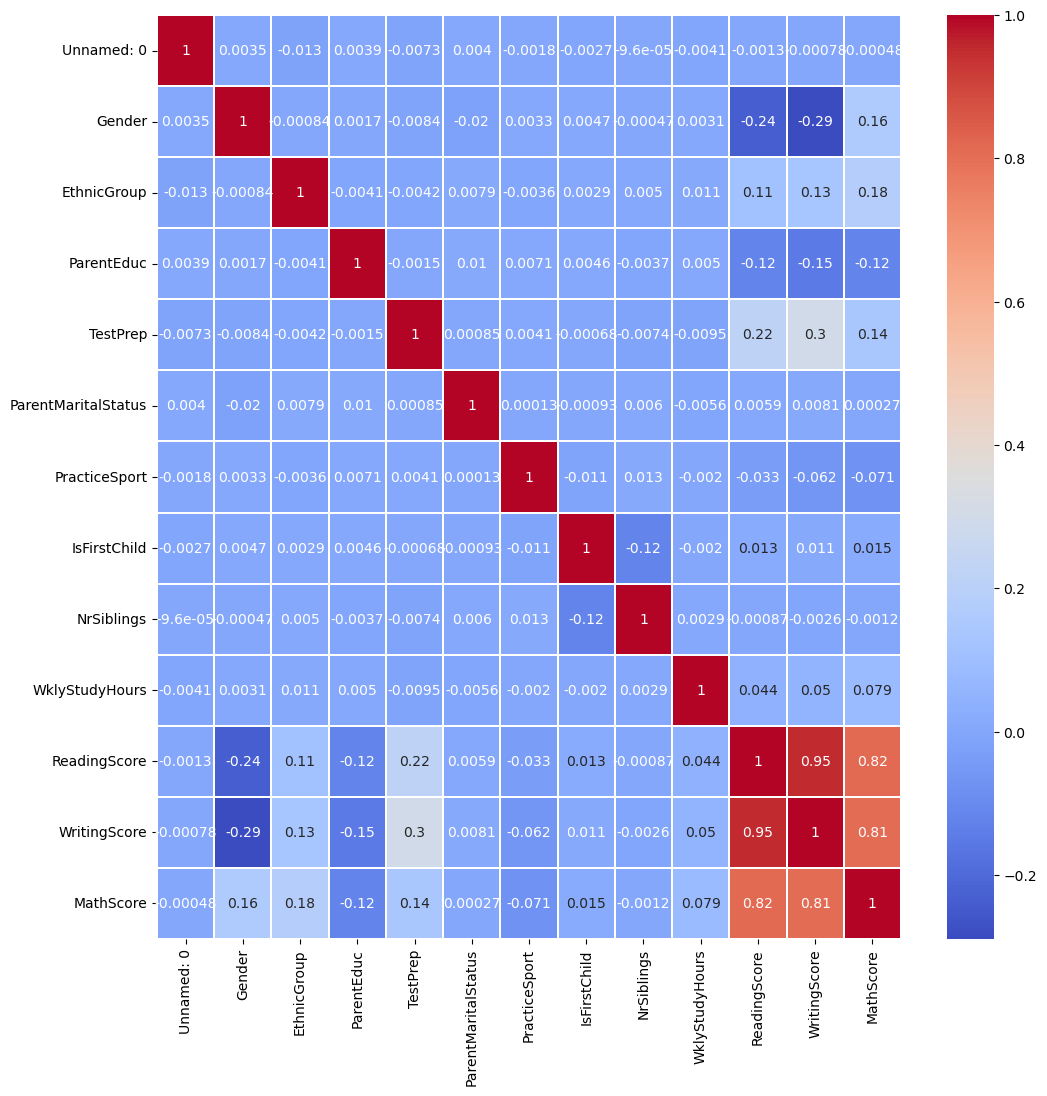

In [12]:
## Check the relationships with  heatmap
plt.figure(figsize=(12,12))
sns.heatmap(DF.corr(), annot=True, cmap="coolwarm", linewidths=0.1)

From the above heatmap, only **ReadingScore** and **WritingScore** has a significant effect on the **MathScore**. Thin means that other columns cannot help us determine whether a student will pass or not, so we _**drop**_ them all.

In [13]:
DF = DF.drop(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'WklyStudyHours'], axis=1)

DF.head()

,ReadingScore,WritingScore,MathScore
0,71,74,71
1,90,88,69
2,93,91,87
3,56,42,45
4,78,75,76


In [14]:
# Determining who passes or not based on defined threshold(Pass Mark), then add a new column (Passed) with the pass outcome.
# Define the threshold
percentage_threshold = 75

# Calculate the percentage scores out of the total (300) and create the 'passed' column
DF['Passed'] = ((((DF['WritingScore'] + DF['ReadingScore'] + DF['MathScore'])/300)*100) >= percentage_threshold).astype(int)

# Print the resulting DataFrame
print(DF)

       ReadingScore  WritingScore  MathScore  Passed
0                71            74         71       0
1                90            88         69       1
2                93            91         87       1
3                56            42         45       0
4                78            75         76       1
...             ...           ...        ...     ...
30636            61            65         59       0
30637            53            51         58       0
30638            70            67         61       0
30639            90            93         82       1
30640            60            58         64       0

[30641 rows x 4 columns]


<Axes: >

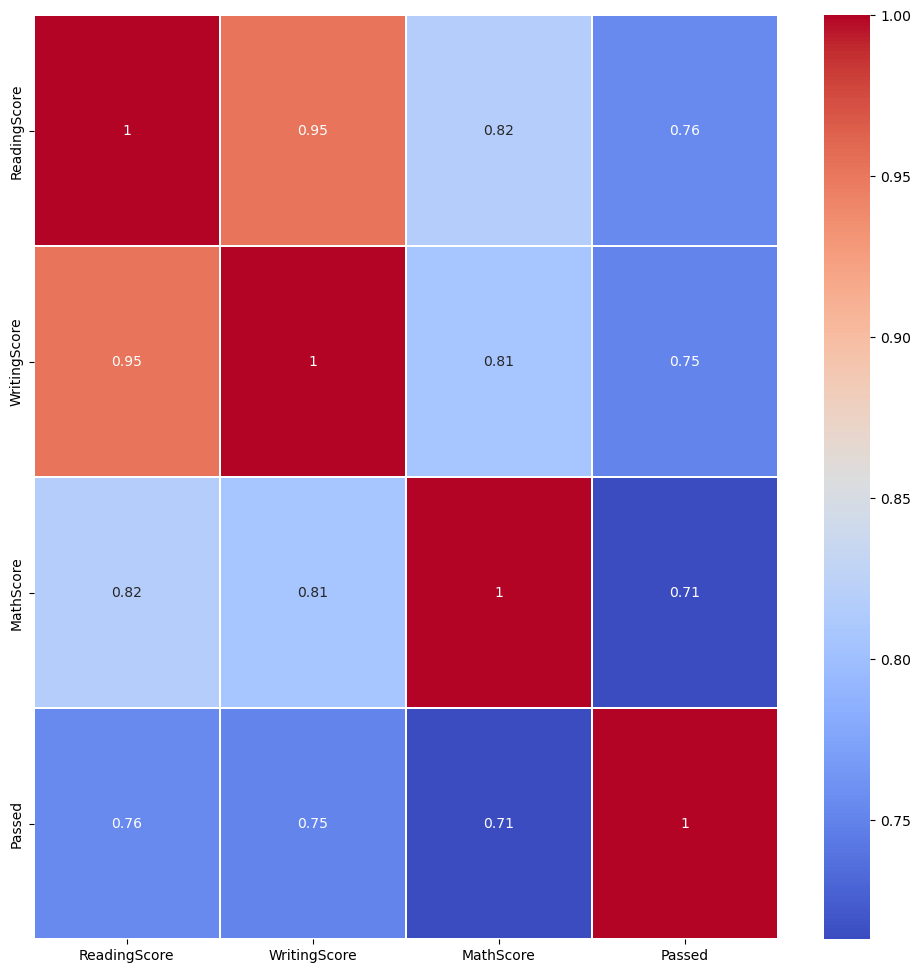

In [15]:
## Check the relationships with  heatmap
plt.figure(figsize=(12,12))
sns.heatmap(DF.corr(), annot=True, cmap="coolwarm", linewidths=0.1)

In [16]:
# Create a new file and save some data in it
newDF = DF.iloc[: , :]
newDF.to_csv("ppStudentsDataSet.csv")

In [17]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ReadingScore  30641 non-null  int64
 1   WritingScore  30641 non-null  int64
 2   MathScore     30641 non-null  int64
 3   Passed        30641 non-null  int32
dtypes: int32(1), int64(3)
memory usage: 838.0 KB


In [18]:
# Take some part of the dataset to creat a train dataset.
traindata = DF.iloc[0:21449, :]
traindata.to_csv("ppStudents_train.csv")

In [19]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21449 entries, 0 to 21448
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ReadingScore  21449 non-null  int64
 1   WritingScore  21449 non-null  int64
 2   MathScore     21449 non-null  int64
 3   Passed        21449 non-null  int32
dtypes: int32(1), int64(3)
memory usage: 586.6 KB


In [20]:
# Take some part of the dataset to create a test data
testdata = DF.iloc[21450:27578, :]
testdata.to_csv("ppStudents_test.csv")

In [21]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6128 entries, 21450 to 27577
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ReadingScore  6128 non-null   int64
 1   WritingScore  6128 non-null   int64
 2   MathScore     6128 non-null   int64
 3   Passed        6128 non-null   int32
dtypes: int32(1), int64(3)
memory usage: 167.7 KB


In [22]:
# Take some part of the dataset to creat a val data
valdata = DF.iloc[27579:, :]
valdata.to_csv("ppStudents_val.csv")

In [23]:
valdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 27579 to 30640
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ReadingScore  3062 non-null   int64
 1   WritingScore  3062 non-null   int64
 2   MathScore     3062 non-null   int64
 3   Passed        3062 non-null   int32
dtypes: int32(1), int64(3)
memory usage: 83.9 KB


## Creating the Machine Learning Model

In [24]:
# machine learning process
# function for loading the dataset from pandas to pytorch
class CustomLoad(Dataset):
    def __init__(self, csv_file, degree):
        
        self.data = pd.read_csv(csv_file)
        self.degree = degree
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        # x, y features
        x = self.data.iloc[idx, 0:self.degree]
        y = self.data.iloc[idx, self.degree]
        
        x_max = x.max()
        x = x.divide(x_max)
        
        return torch.tensor(x).float(), torch.tensor(y).float()  

In [25]:
# loading the dataset with the CustomLoader function
trainingdata = CustomLoad("ppStudents_train.csv",4)
train_dataset = DataLoader(trainingdata, batch_size=64)

for data in train_dataset:
    print(data)
    break

[tensor([[0.0000, 0.9595, 1.0000, 0.9595],
        [0.0111, 1.0000, 0.9778, 0.7667],
        [0.0215, 1.0000, 0.9785, 0.9355],
        [0.0536, 1.0000, 0.7500, 0.8036],
        [0.0513, 1.0000, 0.9615, 0.9744],
        [0.0595, 1.0000, 0.9405, 0.8690],
        [0.0645, 1.0000, 0.9570, 0.9140],
        [0.1628, 1.0000, 0.9070, 0.9535],
        [0.1176, 0.9412, 1.0000, 0.9559],
        [0.1525, 1.0000, 0.8475, 0.6271],
        [0.1724, 0.9310, 0.8966, 1.0000],
        [0.2115, 1.0000, 0.8269, 0.7692],
        [0.1463, 1.0000, 0.9024, 0.8049],
        [0.1625, 0.9125, 0.8875, 1.0000],
        [0.2414, 0.9138, 1.0000, 0.8276],
        [0.1923, 0.9615, 1.0000, 0.8846],
        [0.1798, 1.0000, 0.9663, 0.9888],
        [0.5312, 1.0000, 0.8750, 0.5625],
        [0.3830, 0.8936, 1.0000, 0.9787],
        [0.3276, 0.9655, 1.0000, 0.8621],
        [0.2899, 1.0000, 0.9130, 0.9565],
        [0.2800, 1.0000, 0.9333, 0.8667],
        [0.4151, 1.0000, 0.9623, 0.7925],
        [0.3239, 1.0000, 1.0000, 

In [26]:
# testing the dataset with the CustomLoader function
testingdata = CustomLoad("ppStudents_test.csv",4)
test_dataset = DataLoader(testingdata, batch_size=128)

for data in test_dataset:
    x_test = data[0]
    y_test = data[1]
    break

In [27]:
# validating the model with the custom function
valdingdata = CustomLoad("ppStudents_val.csv",4)
val_dataset = DataLoader(trainingdata, batch_size=128)

for data in val_dataset:
    print(data)
    break

[tensor([[0.0000, 0.9595, 1.0000, 0.9595],
        [0.0111, 1.0000, 0.9778, 0.7667],
        [0.0215, 1.0000, 0.9785, 0.9355],
        [0.0536, 1.0000, 0.7500, 0.8036],
        [0.0513, 1.0000, 0.9615, 0.9744],
        [0.0595, 1.0000, 0.9405, 0.8690],
        [0.0645, 1.0000, 0.9570, 0.9140],
        [0.1628, 1.0000, 0.9070, 0.9535],
        [0.1176, 0.9412, 1.0000, 0.9559],
        [0.1525, 1.0000, 0.8475, 0.6271],
        [0.1724, 0.9310, 0.8966, 1.0000],
        [0.2115, 1.0000, 0.8269, 0.7692],
        [0.1463, 1.0000, 0.9024, 0.8049],
        [0.1625, 0.9125, 0.8875, 1.0000],
        [0.2414, 0.9138, 1.0000, 0.8276],
        [0.1923, 0.9615, 1.0000, 0.8846],
        [0.1798, 1.0000, 0.9663, 0.9888],
        [0.5312, 1.0000, 0.8750, 0.5625],
        [0.3830, 0.8936, 1.0000, 0.9787],
        [0.3276, 0.9655, 1.0000, 0.8621],
        [0.2899, 1.0000, 0.9130, 0.9565],
        [0.2800, 1.0000, 0.9333, 0.8667],
        [0.4151, 1.0000, 0.9623, 0.7925],
        [0.3239, 1.0000, 1.0000, 

# Q2. Implementing Logistic Regression Model

In [28]:
# Building the Logistics Regression model
class LogisticRegression(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegression, self).__init__()
        
        self.linear_layer = nn.Linear(in_features=n_features, out_features=1)
        self.sigmoid = nn.Sigmoid() # this is only differece with linear regression
        
    def forward(self, x):
        x = self.linear_layer(x)
        x = self.sigmoid(x)
        return x

In [29]:
# Instantiate an object of the LogisticRegression class
model = LogisticRegression(n_features=4)
model.train()

LogisticRegression(
  (linear_layer): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [30]:
# set some parameters
#hyper-parameter

# Set some parameters
EPOCHS = 50
learning_rate = 1E-3
loss_function = nn.BCELoss()

# Initialize the optimizer with model parameters
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

ctr_loss, cts_loss, cts_tracc, cts_vacc = [], [], [], []


# Q3. Using loss curve, Accuracy and  Area Under Curve as evaluation metrics.

In [31]:

for epoch in range(EPOCHS):
    itr_losses, iv_losses, tr_acc, val_acc = [], [], [], []
    for x, y in test_dataset:
        
        pred = model(x)
        trainloss = loss_function(pred, y.unsqueeze(-1))
        itr_losses.append(trainloss.item())
        trainacc = binary_accuracy(pred, y.unsqueeze(-1))
        
        optimizer.zero_grad()
        trainloss.backward()
        optimizer.step()
        
        with torch.no_grad():
            
            for xt, yt in val_dataset:
                vpred = model(xt)
                
                vloss = loss_function(vpred, yt.unsqueeze(-1))
                iv_losses.append(vloss.item())
                testacc = binary_accuracy(vpred, yt.unsqueeze(-1))
                val_acc.append(testacc.item())
                
    # average loss of the iteration
    trloss = np.mean(itr_losses)
    vlloss = np.mean(iv_losses)
        
    trloss = np.mean(itr_losses)
    tr_accA = np.mean(tr_acc)
    val_accA = np.mean(val_acc)

    ctr_loss.append(trloss)
    cts_loss.append(vlloss)

    cts_tracc.append(tr_accA)
    cts_vacc.append(val_accA)

    print("Epoch ",epoch," Train loss: ",round(trloss,4),"Test loss: ",round(vlloss,4), " Train Acc: ",round(tr_accA,4),"Test Acc: ",round(val_accA,4) )
    if trloss <= 0.003: break
torch.save(model.state_dict(), '%s/logisticregression_%d_degree.pth' % ("Mid-term", 2))

C:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Epoch  0  Train loss:  0.6703 Test loss:  0.6715  Train Acc:  nan Test Acc:  0.659
Epoch  1  Train loss:  0.6606 Test loss:  0.6617  Train Acc:  nan Test Acc:  0.6598
Epoch  2  Train loss:  0.6534 Test loss:  0.6546  Train Acc:  nan Test Acc:  0.6602
Epoch  3  Train loss:  0.6482 Test loss:  0.6495  Train Acc:  nan Test Acc:  0.6603
Epoch  4  Train loss:  0.6446 Test loss:  0.6461  Train Acc:  nan Test Acc:  0.6603
Epoch  5  Train loss:  0.6422 Test loss:  0.6437  Train Acc:  nan Test Acc:  0.6604
Epoch  6  Train loss:  0.6406 Test loss:  0.6422  Train Acc:  nan Test Acc:  0.6603
Epoch  7  Train loss:  0.6396 Test loss:  0.6413  Train Acc:  nan Test Acc:  0.6603
Epoch  8  Train loss:  0.6389 Test loss:  0.6407  Train Acc:  nan Test Acc:  0.6601
Epoch  9  Train loss:  0.6385 Test loss:  0.6404  Train Acc:  nan Test Acc:  0.66
Epoch  10  Train loss:  0.6382 Test loss:  0.6403  Train Acc:  nan Test Acc:  0.6599
Epoch  11  Train loss:  0.6381 Test loss:  0.6402  Train Acc:  nan Test Acc:  

KeyboardInterrupt: 

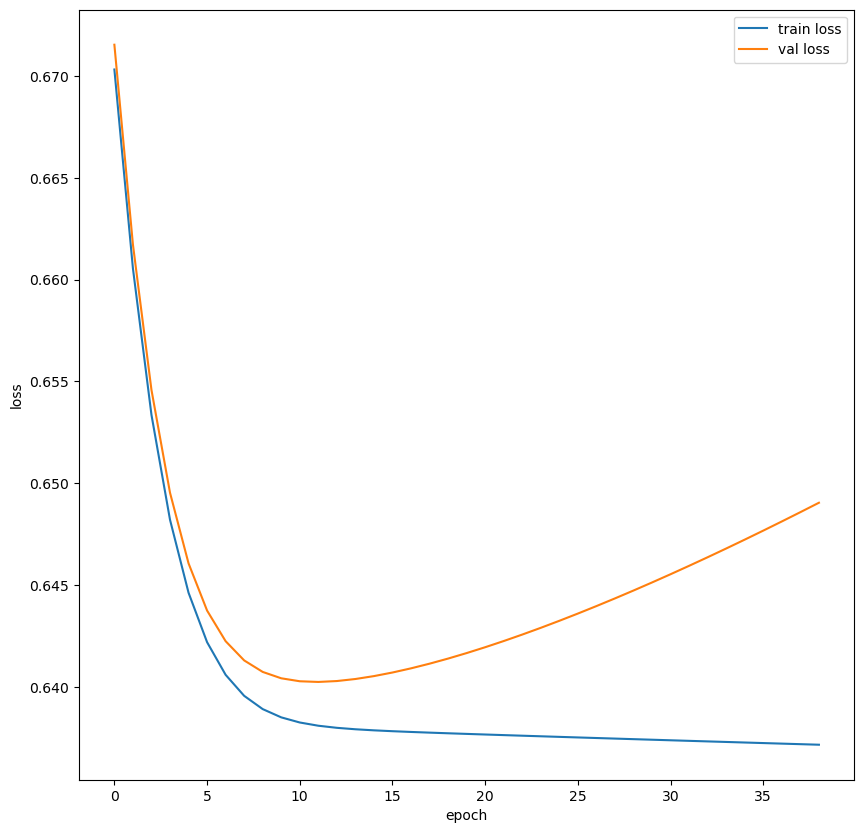

In [32]:
plt.figure(figsize=(10,10))

plt.plot(ctr_loss)
plt.plot(cts_loss)
plt.legend(['train loss', 'val loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [33]:
#loading the model
import os
_ckp = './Mid-term/logisticregression_2_degree.pth'
try:
    os.path.isfile(_ckp)
except IOError as e:
    # Does not exist OR no read permissions
    print("Unable to open ckp file")

# loading the trained model into memory
if _ckp != '':
    if torch.cuda.is_available():
        model.load_state_dict(torch.load(_ckp))
    else:
        # Load GPU model on CPU
        model.load_state_dict(torch.load(_ckp, map_location=lambda storage, loc: storage))
        model.cpu()

In [34]:
model.eval()
test_data = x_test
result_pred = model(test_data)
for r in result_pred:
    print(r[0].item(), " \t\t-->", 1 if r[0].item() > 0.1 else 0)

0.5445973873138428  		--> 1
0.5445392727851868  		--> 1
0.5449332594871521  		--> 1
0.544766366481781  		--> 1
0.5447890162467957  		--> 1
0.5447515249252319  		--> 1
0.5448955297470093  		--> 1
0.5446404218673706  		--> 1
0.5445107817649841  		--> 1
0.5448075532913208  		--> 1
0.5448423624038696  		--> 1
0.5447114706039429  		--> 1
0.5450862050056458  		--> 1
0.5445902347564697  		--> 1
0.544788658618927  		--> 1
0.5445659160614014  		--> 1
0.5449555516242981  		--> 1
0.5446972846984863  		--> 1
0.544616162776947  		--> 1
0.5447303056716919  		--> 1
0.5446236729621887  		--> 1
0.5446404218673706  		--> 1
0.5448598265647888  		--> 1
0.544605553150177  		--> 1
0.5447890758514404  		--> 1
0.5447152256965637  		--> 1
0.5449873805046082  		--> 1
0.5450829267501831  		--> 1
0.544950544834137  		--> 1
0.5446702241897583  		--> 1
0.5446889996528625  		--> 1
0.5449041128158569  		--> 1
0.5447359681129456  		--> 1
0.5446588397026062  		--> 1
0.5448720455169678  		--> 1
0.5449860692024231  		-->